# Modeling
The focus of this notebook is to continue the NLP steps with the text data that has now been turned into a feather file (file name and its corresponding text). Within this notebook you will see the making of the baseline model and model improvements.  

Beginning: The beginning of the notebook shows Unsupervised Sentiment Analysis. This was not my original goal for this project. I was not sure how to go about sentiment analysis and was under the impression that I did not have a target. After speaking with the Lead Instructor and the Coach of our program, I was able to redirect my focus and discover my target. This led to a Supervised Sentiment Anlysis. 

If you are interested in seeing how I began the unsupervised approach, feel free to start at the beginning of the notebook. There is also a link to a blog that talks about how to use this approach. If you want to see the supervised approach scroll down to the ***New Approach*** section of the notebook. 

In [303]:
# Data Importing and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

#Sentiment Analysis
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


# Time series handling 
import datetime
from datetime import date

# Cleaning up memory on computer after running code
import gc; gc.enable()

# Stock market Data Library
import yfinance as yf

# import string

# String handling and NLP model
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from sklearn.model_selection import train_test_split

In [2]:
# Reading from 'Feather' format
df = pd.read_feather('/Users/boimoriba/Documents/Learn.Co_Docs/Projects/Capstone/QQuarterlyInc/CSV_Files/10-Qs.feather')
del df['index']; gc.collect()
# df

0

In [3]:
df.shape # Viewing the shape of the df

(13, 2)

# Next Steps
While condicting online research I came across a YouTube video that went through using the library Textblob. In the previous notbook we were able to remove punctuations, stopwords, and digets(could not parse through because of te timeframe we have. This can be done in the near future). 

We were also able to nomalize the text and create a dataframe from the nomalized text and its corresponding file name. Below you will see my attemped to perform a sentiment analysis on the text data in the df we currently have. The documentation for this library is located in the Resource section. 

# Test Run 1
**Lets try using the libray on one body of text from the df. Keep in mind the df currently holds the 10-Qs of Southern Co. between 2016-2020.** 

In [4]:
# Create Textblob obj to be used for analysis
obj = TextBlob(df.text[10]) 

In [5]:
# Returning a value between 1 & -1
# Using initiated obj to get polarity value
sentiment = obj.sentiment.polarity

In [6]:
print(sentiment) # Printing results 

0.014091192227164666


# Turn It Into A Function
It worked! Now lets try this for every text body in the df by writing a function!! The below cells will consist of two function; one providing the list of sentiment polarity values for each body of text in df[*text*] & another displaying if the text is negative, positive or neutral.

In [7]:
'''This function will take in the df as an argument and 
iterate through the text column that is sliced to the body 
of text its self and return a list of sentiment polarity value 
for each body of text'''
def sentiment_ana(df):
    sentiments_list = []
    i = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    for text in df.text[i]:
            obj = TextBlob(text)
            sentiment = obj.sentiment.polarity
            sentiments_list.append(sentiment)
    return sentiments_list 
            

In [8]:
SO_Sentiments = sentiment_ana(df) # Calling function and assigning to variable

In [9]:
SO_Sentiments # Viewing list of polarity values 

[0.025743580469827186,
 -0.0033127985425172066,
 0.03165365439445174,
 0.02479712515096895,
 0.019257323182357684,
 0.018702514236993255,
 0.014686811941619592,
 0.030788767127009578,
 0.024793322909917113,
 0.047629955462548425,
 0.014091192227164666,
 0.024803428417207694,
 0.01055402079920463]

# Qucik Observation
Now that we have a list of floats that represent each body of text in the df (all 13 10-Qs for Southern Co), lets find the avereage the get and idea of what the over all sentiment of the documents are. You will see the overall language of the documents are positive. But we need a model to predict the next documents sentiment!

In [10]:
SA_Mean = mean(SO_Sentiments)
if SA_Mean == 0: 
    print(SA_Mean)
    print('The text Is Neutral')
    print('\n') 
elif SA_Mean > 0:
    print(SA_Mean)
    print('The Text Is Positive')
    print('\n') 
else:
    print(SA_Mean)
    print('The Text Is Negative')
    print('\n') 

0.02186068444436564
The Text Is Positive




# Is It Positive, Neutral or Negative

In [11]:
'''This function will take in the list of polarity values as an argument and 
iterate through the list, check if the value meets any of the conditions,
and print the text that matches the values met condition.'''
def SA(_list):
    for sentiment in _list:
        if sentiment == 0: 
            print(sentiment)
            print('The text Is Neutral')
            print('\n') 
        elif sentiment > 0:
            print(sentiment)
            print('The Text Is Positive')
            print('\n') 
        else:
            print(sentiment)
            print('The Text Is Negative')
            print('\n') 

In [12]:
Sentiment_Results = SA(SO_Sentiments)

0.025743580469827186
The Text Is Positive


-0.0033127985425172066
The Text Is Negative


0.03165365439445174
The Text Is Positive


0.02479712515096895
The Text Is Positive


0.019257323182357684
The Text Is Positive


0.018702514236993255
The Text Is Positive


0.014686811941619592
The Text Is Positive


0.030788767127009578
The Text Is Positive


0.024793322909917113
The Text Is Positive


0.047629955462548425
The Text Is Positive


0.014091192227164666
The Text Is Positive


0.024803428417207694
The Text Is Positive


0.01055402079920463
The Text Is Positive




# Test Run 2
Looking into the advance use of Textblob I was able to find code that can do the sentiment analysis of the text for me, in just a few lines of code. This code was taken from the Textblod documentation. The link to this code is provided in the Resource Section of the notebook. Lets test out this code  ...

In [13]:
# NLTK classifier trained on a movie reviews corpus.
# Using trained NB Analyzer to do sentiment analysis on a body of text
blob = TextBlob(df.text[0], analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=7.994055237498093e-59)

In [14]:
'''This function will take in the df as an argument and 
iterate through the text column that is sliced to the body 
of text its self and return a list of sentiment values 
for each body of text'''
def sentiment_ana2(df):
    sentiments_list = []
    i = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    for text in df.text[i]:
            obj = TextBlob(text)
            sentiments = obj.sentiment
            sentiments_list.append(sentiments)
    return sentiments_list 

In [15]:
SA_p2 = sentiment_ana2(df)
SA_p2
# polarity is how positive or neg text is between -1 & 1
# subjectivity is how opinionated the text seems to be, between -1 & 1

[Sentiment(polarity=0.025743580469827186, subjectivity=0.2540728170602351),
 Sentiment(polarity=-0.0033127985425172066, subjectivity=0.21546182328981334),
 Sentiment(polarity=0.03165365439445174, subjectivity=0.2412985417005685),
 Sentiment(polarity=0.02479712515096895, subjectivity=0.24103082251213098),
 Sentiment(polarity=0.019257323182357684, subjectivity=0.24951626760818546),
 Sentiment(polarity=0.018702514236993255, subjectivity=0.3198025500406785),
 Sentiment(polarity=0.014686811941619592, subjectivity=0.2394814773079978),
 Sentiment(polarity=0.030788767127009578, subjectivity=0.2808617455424036),
 Sentiment(polarity=0.024793322909917113, subjectivity=0.26371509564186707),
 Sentiment(polarity=0.047629955462548425, subjectivity=0.29089749264666365),
 Sentiment(polarity=0.014091192227164666, subjectivity=0.23202066756152523),
 Sentiment(polarity=0.024803428417207694, subjectivity=0.22793639634486648),
 Sentiment(polarity=0.01055402079920463, subjectivity=0.24379420524338227)]

# Test Run 3

In [16]:
'''This function uses a NLTK classifier that was trained
on a movie reviews corpus. It will take in the df as an argument, 
go through each body of text in the text column and perform 
a sentiment analysis using trained NB Analyzer.
It will return the analysis for each body of text in the df.'''

def sentiment_ana3(df):
    sentiments_list = []
    i = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    for text in df.text[i]:
            blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
            sentiments = blob.sentiment
            sentiments_list.append(sentiments)
    return sentiments_list

In [17]:
SA_p3 = sentiment_ana3(df) # Calling the function and assigning results to a variable

In [18]:
SA_p3 # Calling variable

[Sentiment(classification='pos', p_pos=1.0, p_neg=7.994055237498093e-59),
 Sentiment(classification='pos', p_pos=1.0, p_neg=1.9328015799642474e-54),
 Sentiment(classification='pos', p_pos=1.0, p_neg=8.681604915330248e-51),
 Sentiment(classification='pos', p_pos=1.0, p_neg=8.332839280044437e-45),
 Sentiment(classification='pos', p_pos=1.0, p_neg=7.02691649602693e-62),
 Sentiment(classification='pos', p_pos=1.0, p_neg=9.397962013413978e-46),
 Sentiment(classification='pos', p_pos=1.0, p_neg=4.991106707551972e-91),
 Sentiment(classification='pos', p_pos=1.0, p_neg=1.9355736723606737e-73),
 Sentiment(classification='pos', p_pos=1.0, p_neg=2.035307026919699e-60),
 Sentiment(classification='pos', p_pos=1.0, p_neg=2.438798193514326e-54),
 Sentiment(classification='pos', p_pos=1.0, p_neg=4.995200663023715e-50),
 Sentiment(classification='pos', p_pos=1.0, p_neg=2.68729553663566e-53),
 Sentiment(classification='pos', p_pos=1.0, p_neg=3.896515836791994e-65)]

# Trouble
The approach you seen above was an example of Unserpervised Sentiment Analysis, but I have a target! My focus is to see if the stock price went up or down for the company, after the 10-Q were filed. Using online resources I will create my target column, feature engineer my df and then build a classifier using Textblob. If you are interested on continuing the unsepervised sentiment analysis, there will be a link provided in the Resources Section. 

Also after looking at the documents one by one the obtain the filing date I discovered that one of the 10-Q documents belonged to another company, this must be removed from the df for a proper analysis of Southern Co.

# Next Steps
Drop the document that belongs to another company & then add following features: 
- Date 10-Q was filed
- Highs, lows, closing and opening stock price for date a week before file date
- Highs, lows, closing and opening stock price for file date
- Calculate the sentiment polarity and subjective value

**Target: Yes Or No Stock Price Increased**

# Feature Engineering
The data frame doesn't have much info needed for a proper analysis. I am aimming to have a great performing model, to have that I need more information for my model to learn from. In this section you will see feature engineering of the data I have as well as added data I didn't have.

In [19]:
# Dropping the document that belongs to another company
df2 = df.drop(index=0)

In [20]:
df2.head() # Checking work

,file_name,text
1,0000092122-18-000050.txt,txt hdrsgml access number conform submiss type...
2,0000092122-19-000016.txt,txt hdrsgml access number conform submiss type...
3,0000092122-18-000027.txt,txt hdrsgml access number conform submiss type...
4,0000092122-16-000213.txt,txt hdrsgml access number conform submiss type...
5,0000092122-20-000042.txt,txt hdrsgml access number conform submiss type...


# Date 10-Q Was Filed

In [21]:
# Creating date filed column
df2['Date_Filed']= [20180808,
 20190501,
 20180502,
 20161104,
 20200430,
 20170802,
 20160505,
 20160808,
 20191030,
 20171101,
 20190731,
 20181107]

In [22]:
# Making sure the dates or in ascending order & viewing work
df2 = df2.sort_values(by=['Date_Filed'], ascending = True)
df2

,file_name,text,Date_Filed
7,0000092122-16-000144.txt,txt hdrsgml access number conform submiss type...,20160505
8,0000092122-16-000179.txt,txt hdrsgml access number conform submiss type...,20160808
4,0000092122-16-000213.txt,txt hdrsgml access number conform submiss type...,20161104
6,0000092122-17-000065.txt,txt hdrsgml access number conform submiss type...,20170802
10,0000092122-17-000076.txt,txt hdrsgml access number conform submiss type...,20171101
3,0000092122-18-000027.txt,txt hdrsgml access number conform submiss type...,20180502
1,0000092122-18-000050.txt,txt hdrsgml access number conform submiss type...,20180808
12,0000092122-18-000062.txt,txt hdrsgml access number conform submiss type...,20181107
2,0000092122-19-000016.txt,txt hdrsgml access number conform submiss type...,20190501
11,0000092122-19-000037.txt,txt hdrsgml access number conform submiss type...,20190731


# Recap 
Drop the document that belongs to another company (**Complete**) & then add following features:

- Date 10-Q was filed **Complete**

- Highs, lows, closing and opening stock price for date a week before file date

- Highs, lows, closing and opening stock price for file date

- Calculate the sentiment polarity and subjective value

**Target: Yes Or No Stock Price Increased**

# Highs, Lows, Closing, & Opening Stock Price A Week Before File Date
In this section I am assigning the  list of high, low, open, close, and adj close prices to a variable I can call later on. 

In [23]:
df2['Opening_bfd'] = [49.28,
                  53.44,
                  53.44,
                  46.78,
                  52.18,
                  45.59,
                  48.42,
                  45.50,
                  51.88,
                  55.46,
                  61.43,
                  57.01]

In [24]:
df2['Highs_bfd'] = [49.96,
                   53.80,
                   53.80,
                   47.40,
                   52.33,
                   46.32,
                   48.47,
                   45.50,
                   52.37,
                   55.67,
                   61.95,
                   57.50]

In [25]:
df2['Lows_bfd'] = [49.13,
                  53.37,
                  53.37,
                  46.71,
                  51.69,
                  45.57,
                  47.66,
                  44.62,
                  51.84,
                  55.10,
                  61.43,
                  56.10]

In [26]:
df2['Closing_bfd'] = [49.95,
                     53.65,
                     53.65,
                     47.40,
                     52.21,
                     46.03,
                     48.08,
                     45.03,
                     52.23,
                     55.64,
                     61.95,
                     56.80]

In [27]:
df2['AdjClosing_bfd'] = [40.99,
                        44.52,
                        44.52,
                        41.17,
                        45.89,
                        41.46,
                        43.91,
                        41.65,
                        49.53,
                        53.38,
                        60.08,
                        56.14]

# Highs, Lows, Closing, & Opening Stock Price For File Date
In this section I am assigning the  list of high, low, open, close, and adj close prices to a variable I can call later on. 

In [28]:
df2['Opening_ofd'] = [51.15,
                52.71,
                50.66,
                48.51,
                49.17,
                45.81,
                47.45,
                43.81,
                52.23,
                55.75,
                61.01,
                59.22]

In [29]:
df2['Highs_ofd'] = [51.56,
                53.04,
                50.66,
                50.08,
                49.44,
                46.43,
                47.50,
                44.34,
                53.21,
                56.64,
                62.88,
                59.30]

In [30]:
df2['Lows_ofd'] = [50.34,
               52.44,
               49.54,
               47.91,
               48.95,
               45.62,
               46.70,
               43.67,
               52.16,
               55.15,
               61.00,
                57.27]

In [31]:
df2['Closing_ofd'] = [50.62,
                  52.69,
                  49.84,
                  49.78,
                  49.14,
                  46.25,
                  46.88,
                  43.92,
                  52.52,
                  56.20,
                  62.63,
                  57.37]

In [32]:
df2['AdjClosing_ofd'] = [41.54,
                     43.72,
                     41.80,
                     43.24,
                     43.19,
                     41.65,
                     42.81,
                     40.62,
                     49.81,
                     53.91,
                     60.74,
                     56.70]

# Calculate The Sentiment Polarity & Subjective Value

In [33]:
# Code used below cam from Alice Zhao Link to github will be in Resource Section
# Code used to calculate the sentiment polar and subjective value
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df2['polarity'] = df['text'].apply(pol)
df2['subjectivity'] = df['text'].apply(sub)

In [34]:
df2.head(3)

,file_name,text,Date_Filed,Opening_bfd,Highs_bfd,Lows_bfd,Closing_bfd,AdjClosing_bfd,Opening_ofd,Highs_ofd,Lows_ofd,Closing_ofd,AdjClosing_ofd,polarity,subjectivity
7,0000092122-16-000144.txt,txt hdrsgml access number conform submiss type...,20160505,49.28,49.96,49.13,49.95,40.99,51.15,51.56,50.34,50.62,41.54,0.030789,0.280862
8,0000092122-16-000179.txt,txt hdrsgml access number conform submiss type...,20160808,53.44,53.80,53.37,53.65,44.52,52.71,53.04,52.44,52.69,43.72,0.024793,0.263715
4,0000092122-16-000213.txt,txt hdrsgml access number conform submiss type...,20161104,53.44,53.80,53.37,53.65,44.52,50.66,50.66,49.54,49.84,41.80,0.019257,0.249516


In [ ]:
# df2.Date_Filed

# Recap 
Drop the document that belongs to another company (**Complete**) & then add following features:

- Date 10-Q was filed **Complete**

- Highs, lows, closing and opening stock price for date a week before file date **Complete**

- Highs, lows, closing and opening stock price for file date **Complete**

- Calculate the sentiment polarity and subjective value **Complete**

**Target: Yes Or No Stock Price Increased**

# The Target

In [35]:
df2.columns # What columns are we working with

Index(['file_name', 'text', 'Date_Filed', 'Opening_bfd', 'Highs_bfd',
       'Lows_bfd', 'Closing_bfd', 'AdjClosing_bfd', 'Opening_ofd', 'Highs_ofd',
       'Lows_ofd', 'Closing_ofd', 'AdjClosing_ofd', 'polarity',
       'subjectivity'],
      dtype='object')

In [36]:
# Finding the average of the stock prices and assigning them to a variable
ofd_Average = df2[['Opening_ofd', 'Highs_ofd',
       'Lows_ofd', 'Closing_ofd', 'AdjClosing_ofd']].mean(axis=0)
ofd_Average

Opening_ofd       51.456667
Highs_ofd         52.090000
Lows_ofd          50.895833
Closing_ofd       51.486667
AdjClosing_ofd    46.644167
dtype: float64

In [37]:
# Finding the average of the stock prices and assigning them to a variable
bfd_Average = df2[['Opening_bfd', 'Highs_bfd',
       'Lows_bfd', 'Closing_bfd', 'AdjClosing_bfd']].mean(axis=0)
bfd_Average

Opening_bfd       51.700833
Highs_bfd         52.089167
Lows_bfd          51.382500
Closing_bfd       51.885000
AdjClosing_bfd    46.936667
dtype: float64

# This was an attempt to create a target column, at this point I checked in with the instructor and coach. I was was able to get the guidence need to reapproach the analysis. 

In [ ]:
# def target_list(average_list):
#     target = []
#     value = 0
#     for ofd in ofd_Average:
#         for bfd in bfd_Average:
#             if ofd > bfd:
#                 target.append(value)
#                 value += 1 
#             else: 
#                 return target   

# New Approach
In this section you will see the process of supervised sentiment analysis. The code for using the yahoo finance library was provided by Bryan Arnold, his info will be linked in the Reasource section below.

**Focus:** I want to look at the relationship between the sentiment analysis of a 10-Q and the stock price. Percent change will be my target. 

Objectives:
- Clean up & feature engineer original df 
- Locate the dates in hist df that match up with the dates in the SO df 
- Merge the two after dates are located in hist
- Grabbing historical price data for S&P 500
- Merging the historical price data for to the new df 
- Calculate the % change for SO & S&P 500

In [38]:
# Downloading historical price data for Southern Co
# ticker = 'SO'
hist = yf.download('SO')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# ticker = '^GSPC' # Doing the same for S&P500 Index
# hist = yf.download(ticker)

In [39]:
hist.head() # Viewing the price data that was collected

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-12-31,3.703581,3.741762,3.6654,3.665400,0.048629,220900
1982-01-04,3.703581,3.741762,3.6654,3.741762,0.049642,365000
1982-01-05,3.818125,3.932669,3.6654,3.703581,0.049136,666500
1982-01-06,3.703581,3.741762,3.6654,3.703581,0.049136,500900
1982-01-07,3.703581,3.703581,3.6654,3.665400,0.048629,171500


In [40]:
hist.shape

(9681, 6)

In [41]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9681 entries, 1981-12-31 to 2020-05-22
Data columns (total 6 columns):
Open         9681 non-null float64
High         9681 non-null float64
Low          9681 non-null float64
Close        9681 non-null float64
Adj Close    9681 non-null float64
Volume       9681 non-null int64
dtypes: float64(5), int64(1)
memory usage: 529.4 KB


In [42]:
# Pulling the year and month from the price data
hist['year'] = hist.index.year
hist['month'] = hist.index.month

In [43]:
# Pulling the quarter the stock price was in 
hist['qrtr'] = hist.month // 4 + 1

In [131]:
hist.head() # Viewing the new added features

,Open,High,Low,Close,Adj Close,Volume,year,month,qrtr
Date,,,,,,,,,
1981-12-31,3.703581,3.741762,3.6654,3.665400,0.048629,220900,1981,12,4
1982-01-04,3.703581,3.741762,3.6654,3.741762,0.049642,365000,1982,1,1
1982-01-05,3.818125,3.932669,3.6654,3.703581,0.049136,666500,1982,1,1
1982-01-06,3.703581,3.741762,3.6654,3.703581,0.049136,500900,1982,1,1
1982-01-07,3.703581,3.703581,3.6654,3.665400,0.048629,171500,1982,1,1


In [132]:
## Finding the average of the adj closing price for 2009 in quater 2
key = ((hist.qrtr == 2) & (hist.year == 2009))
before = hist.loc[key, 'Adj Close'].mean()

In [45]:
# Finding the average of the adj closing price for 2009 in quater 3
key = ((hist.qrtr == 3) & (hist.year == 2009))
after = hist.loc[key, 'Adj Close'].mean()

In [46]:
# Calculating the percent change for those averages 
(after-before)/before

0.07517774524384291

# Apply It To The Dataframe
In this section I will locate the dates from the hist dataframe that match up with the filing dates in the SO text dataframe. From there I will merge the two dataframes making it easier to work with. I will be doing more feature engineering using the code in the cells above. 

This will give me the needed prices, quarter of price, year and month of price. With this the percentage change can be calculated. From there I will check for correlations between the % change in price for Southern co & the sentiment values. If there is a high correlation this proves that the quarterly reports have an impact on the stock price. I will do working with first dataframe for the beginning of the notebook.

In [47]:
df.head() # Viewing the df 

,file_name,text
0,0000092122-17-000024.txt,txt hdrsgml access number conform submiss type...
1,0000092122-18-000050.txt,txt hdrsgml access number conform submiss type...
2,0000092122-19-000016.txt,txt hdrsgml access number conform submiss type...
3,0000092122-18-000027.txt,txt hdrsgml access number conform submiss type...
4,0000092122-16-000213.txt,txt hdrsgml access number conform submiss type...


In [ ]:
# Making sure the dates or in ascending order & viewing work
# df = df.sort_values(by=['file_name'], ascending = True)
# df.head()

# Index Manipulation

In [48]:
df = df.drop(index=0) # Dropping unwanted file

In [59]:
# Creating date filed column
df['Dates_Filed']= ['2016-5-5',
                  ' 2016-8-8',
                   '2016-11-4',
                   '2017-8-2',
                   '2017-11-1',
                  ' 2018-5-2',
                   '2018-8-8',
                   '2018-11-7',
                   '2019-5-1',
                   '2019-7-31',
                   '2019-10-30',
                   '2020-4-30']

In [50]:
df.drop(columns = 'file_name', inplace = True) # dropping unwanted column

In [56]:
df.set_index('Dates_Filed', inplace = True) # Setting date to index

# Sentiment Analysis On DF

In [52]:
# Code used below cam from Alice Zhao Link to github will be in Resource Section
# Code used to calculate the sentiment polar and subjective value
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)

# String To Datatime Object

In [60]:
df['Date_of_Filing'] = pd.to_datetime(df['Dates_Filed']) # Creating column with datetime objects

In [58]:
df.info() # Checking work

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016-5-5 to 2020-4-30
Data columns (total 3 columns):
text            12 non-null object
polarity        12 non-null float64
subjectivity    12 non-null float64
dtypes: float64(2), object(1)
memory usage: 384.0+ bytes


# More Index Manipulation

In [61]:
df.set_index('Date_of_Filing', inplace = True) # setting date time object to index

In [62]:
df.drop(columns = 'Dates_Filed', inplace = True) # dropping unwanted columns

In [63]:
df.head() # Checking work 

,text,polarity,subjectivity
Date_of_Filing,,,
2016-05-05,txt hdrsgml access number conform submiss type...,-0.003313,0.215462
2016-08-08,txt hdrsgml access number conform submiss type...,0.031654,0.241299
2016-11-04,txt hdrsgml access number conform submiss type...,0.024797,0.241031
2017-08-02,txt hdrsgml access number conform submiss type...,0.019257,0.249516
2017-11-01,txt hdrsgml access number conform submiss type...,0.018703,0.319803


# Recap
- Clean up & feature engineer original df **Complete**
- Locate the dates in hist df that match up with the dates in the SO df
- Merge the two after dates are located in hist
- Grabbing historical price data for S&P 500
- Merging the historical price data for to the new df 
- Calculate the % change for SO & S&P 500

# Merging

In [64]:
df.rename_axis(index={'Date_of_Filing': 'Date'}, inplace=True) 
# Renaming the index in df so merge can happen smoothly

In [65]:
hist_df = hist.loc[df.index] # Locating rows in hist df that match with the rows in the SO df

In [66]:
df_mer = pd.merge(df, hist_df, left_index=True, right_index=True) # Merging the two df together

In [174]:
# df_mer # Checking the merge

In [175]:
# df_mer.info() # Checking the details of new df

# Recap
- Clean up & feature engineer original df **Complete**
- Locate the dates in hist df that match up with the dates in the SO df **Complete**
- Merge the two after dates are located in hist **Complete**
- Grabbing historical price data for S&P 500
- Merging the historical price data for to the new df 
- Calculate the % change for SO & S&P 500

In [152]:
'''The function below will take in a quarter and a year 
and calulate the average of thier adjusted closing price for 
Southern Co.'''

def SO_adj_avg(d, yr):
    key = ((hist.qrtr == d) & (hist.year == yr))
    avg= hist.loc[key, 'Adj Close'].mean()
    return avg

In [179]:
'''Creating a function that will print all the averages with there corresponding quater and year'''
def SO_avg_list():
    for d in range(1, 4):
        for yr in range(2016, 2020):
            print(f'Quarter:', d)
            print(f'Year:', yr)
            print(SO_adj_avg(d, yr), '\n')

# S&P 500

In [156]:
# Downloading historical price data for S&P 500
hist_sp500 = yf.download('^GSPC')


[*********************100%***********************]  1 of 1 completed


In [167]:
'''The function below will take in a quarter and a year 
and calulate the average of thier adjusted closing price for 
SP 500.'''
def SP500_adj_avg(d, yr):
    key = ((hist_sp500.qrtr == d) & (hist_sp500.year == yr))
    avg= hist_sp500.loc[key, 'Adj Close'].mean()
    return avg

In [165]:
# Pulling the year, month, and quarter from the price data of SP 500
hist_sp500['qrtr'] = hist_sp500.index.month // 4 + 1
hist_sp500['year'] = hist_sp500.index.year
hist_sp500['month'] = hist_sp500.index.month

In [177]:
'''Creating a function that will print all the averages with there corresponding quater and year'''
def SP500_avg_list ():
    for d in range(1, 4):
        for yr in range(2016, 2020):
            print(f'Quarter:', d)
            print(f'Year:', yr)
            print(SP500_adj_avg(d, yr), '\n')

# Calculating The Percent Change  
To calculate the % change of a stock price you use the following formula(after price 1 quarter - price 1 quarter before)/price 1 quarter before) all * 100. In this ection you will se the creating columns that hold the information needed to complete this formula. I will calculating the % cahnge for both S&P 500 and SO Co.  

# Calculating % Change SO

In [259]:
# Creating the column that represents the price before the filing date
df_mer["SO Avg Adj Close"] = [39.784238721503584,
                             42.26210485185896,
                             42.26210485185896,
                             42.80460592063076,
                             42.80460592063076,
                             39.70631533763448,
                             41.290364299100986,
                             41.290364299100986,
                             46.20323612650887,
                             46.20323612650887,
                             51.72032564948587,
                             62.324199491931545]

In [258]:
SO_adj_avg(1, 2020) # Calling function for quarter 1 year 2020

62.324199491931545

In [260]:
# SO_avg_list() Printing average prices for SO Co

In [277]:
# Formula
# Calculating the percent change for those averages 
# (after-before)/before

In [267]:
# Calculating price change
SO_change = (df_mer["Adj Close"] - df_mer["SO Avg Adj Close"] ) / df_mer["SO Avg Adj Close"]

In [268]:
df_mer['SO % Change'] = SO_change * 100 # Creating % change column 

# Calculating % Change S&P 500

In [230]:
# Gabbing the avg price for S&P 500
df_mer["S&P Adj Close"] = [2050.629883,
                           2180.889893,
                          2085.179932,
                          2477.570068,
                          2579.360107,
                          2635.669922,
                          2857.699951,
                          2813.889893,
                          2923.729980,
                          2980.379883,
                          3046.770020,
                          2912.429932]

In [262]:
# Creating the column that represents the price before the filing date
df_mer["S&P Avg Adj Close"] = [1951.224913550205,
                               2092.6958283923923,
                               2092.6958283923923,
                               2411.4966143872366,
                               2411.4966143872366,
                               2733.4767225922133,
                               2725.4930606617645,
                               2725.4930606617645,
                               2721.004418545082,
                               2721.004418545082,
                               2911.778225528493,
                               3055.8691839402723]

In [263]:
# SP500_avg_list() Printing list of avg price for S&P 500

In [223]:
SP500_adj_avg(1, 2020) # Calling function for quarter 1 year 2020

3055.8691839402723

In [278]:
# Formula
# Calculating the percent change for those averages 
# (after-before)/before

In [271]:
# Calculating price change
SP500_change = (df_mer["S&P Adj Close"] - df_mer["S&P Avg Adj Close"]) / df_mer["S&P Avg Adj Close"]

In [272]:
df_mer['S&P 500 % Change'] = SP500_change * 100 # Creating % change column

In [276]:
df_mer.head(3) #Checking work

,text,polarity,subjectivity,Open,High,Low,Close,Adj Close,Volume,year,month,qrtr,S&P Adj Close,SO Avg Adj Close,S&P Avg Adj Close,SO % Change,S&P 500 % Change
Date,,,,,,,,,,,,,,,,,
2016-05-05,txt hdrsgml access number conform submiss type...,-0.003313,0.215462,51.150002,51.560001,50.340000,50.619999,41.537849,7703300,2016,5,2,2050.629883,39.784239,1951.224914,4.407803,5.094491
2016-08-08,txt hdrsgml access number conform submiss type...,0.031654,0.241299,52.709999,53.040001,52.439999,52.689999,43.723042,3422100,2016,8,3,2180.889893,42.262105,2092.695828,3.456848,4.214376
2016-11-04,txt hdrsgml access number conform submiss type...,0.024797,0.241031,50.560001,50.770000,50.000000,50.110001,42.027184,4807200,2016,11,3,2085.179932,42.262105,2092.695828,-0.555868,-0.359149


# Recap
- Clean up & feature engineer original df **Complete**
- Locate the dates in hist df that match up with the dates in the SO df **Complete**
- Merge the two after dates are located in hist **Complete**
- Grabbing historical price data for S&P 500 **Complete**
- Merging the historical price data for to the new df **Complete**
- Calculate the % change for SO & S&P 500 **Complete**

# Correlation
The feature engineering is done, for now. The next goal is to check for any correlations between the % change of Southern Co and its sentiment values. I will also do the same for the % change for Southern Co and the S&P 500. This section will show the correlation chart as well as graphs that display each of the relationships listed. 

# Heatmap
From the heat map below you can see that there is no correlation between the sentiment values and the SO % change. But there is a high correalation between the % Change SO and % Change S&P 500. This makes sense because, if the overall market is in an up trend then the individual stocks in the market are usually in an up trend as well. This is probably why people say never go against the market!

I do believe that with more collected documents and collected news feeds there is a way one can find a pattern in the sentiment analysis of this data to make a prediction on the future returns of a company. The more data the better, right? Also, if one has a technique they use for fundamental analysis of stocks, it could be used to determine which documents & news feeds to collect. 

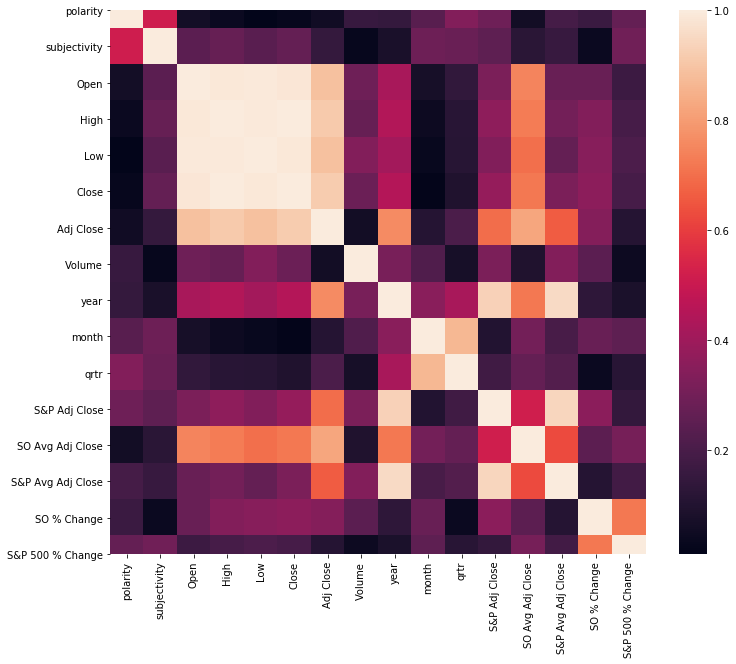

In [281]:
plt.figure(figsize = (12,10))
sns.heatmap(df_mer.corr().abs())    # To see the correlations
plt.show()

# Line Graph

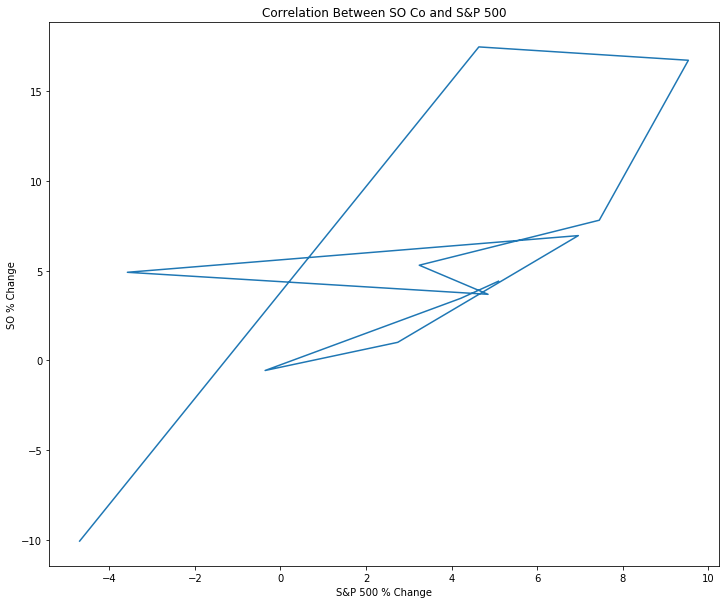

In [362]:
plt.figure(figsize = (12,10))
plt.plot(df_mer['S&P 500 % Change'], df_mer['SO % Change'])
plt.title('Correlation Between SO Co and S&P 500')
plt.xlabel('S&P 500 % Change') 
plt.ylabel('SO % Change') 
plt.show()

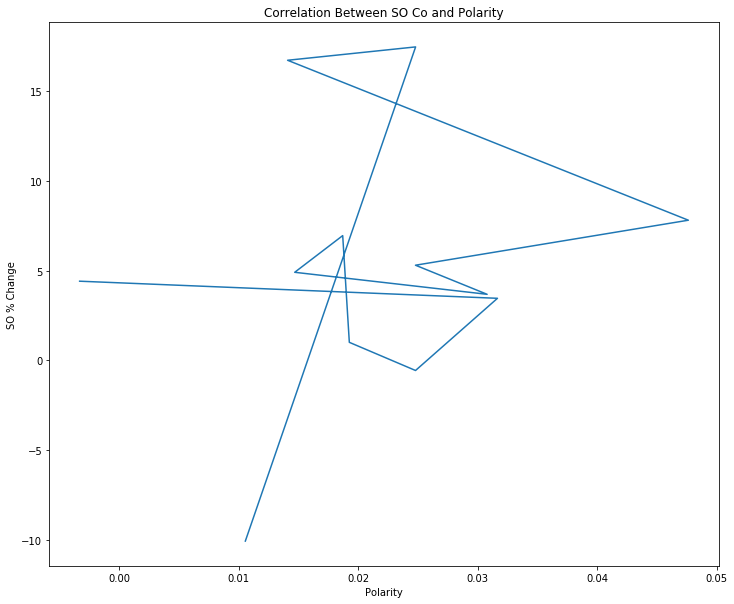

In [363]:
plt.figure(figsize = (12,10))
plt.plot(df_mer['polarity'], df_mer['SO % Change'])
plt.title('Correlation Between SO Co and Polarity')
plt.xlabel('Polarity') 
plt.ylabel('SO % Change') 
plt.show()

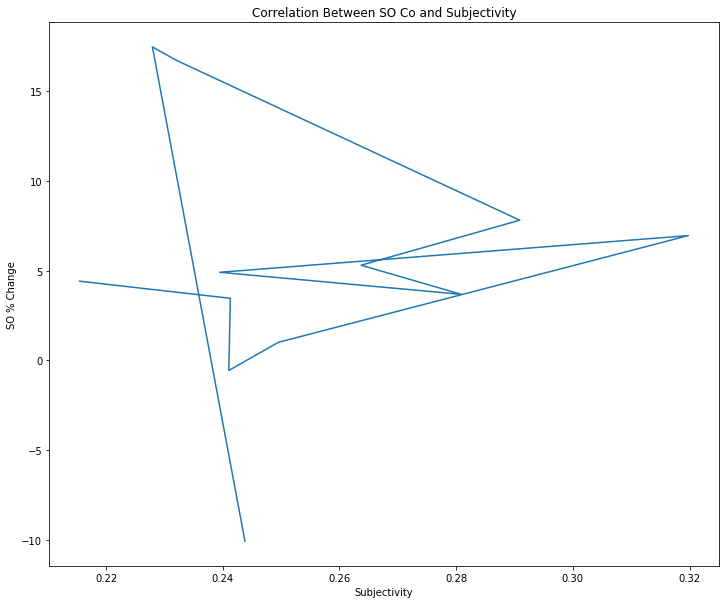

In [365]:
plt.figure(figsize = (12,10))
plt.plot(df_mer['subjectivity'], df_mer['SO % Change'])
plt.title('Correlation Between SO Co and Subjectivity')
plt.xlabel('Subjectivity') 
plt.ylabel('SO % Change') 
plt.show()

# % Change Modeling 


In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [311]:
df_mer.columns

Index(['text', 'polarity', 'subjectivity', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'year', 'month', 'qrtr', 'S&P Adj Close',
       'SO Avg Adj Close', 'S&P Avg Adj Close', 'SO % Change',
       'S&P 500 % Change'],
      dtype='object')

In [333]:
X = df_mer['S&P 500 % Change'].values.reshape(-1, 1)
y = df_mer['SO % Change'].values.reshape(-1, 1)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=8)

In [335]:
model = LinearRegression()
scaler = RobustScaler()
pipe = make_pipeline(scaler,model)

In [336]:
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

In [345]:
model.score(X_test, y_test)

-14.245278167234565

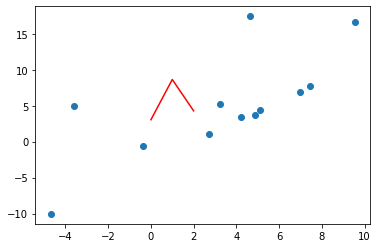

In [338]:
plt.scatter(X,y)
plt.plot(test_preds, color= 'red')
plt.show()

# Sentiment Analysis Modeling

# Polarity

In [346]:
X2 = df_mer['polarity'].values.reshape(-1, 1)
y2 = df_mer['SO % Change'].values.reshape(-1, 1)

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.25, random_state=8)

In [349]:
pipe.fit(X_train, y_train)
train_preds2 = pipe.predict(X_train)
test_preds2 = pipe.predict(X_test)

In [350]:
model.score(X_test, y_test)

-3.92352494192549

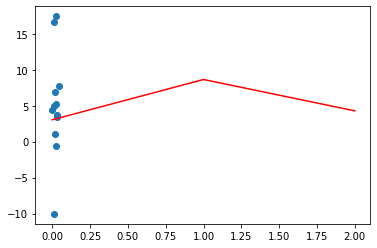

In [351]:
plt.scatter(X2,y2)
plt.plot(test_preds, color= 'red')
plt.show()

# Subjectivity

In [354]:
X3 = df_mer['subjectivity'].values.reshape(-1, 1)
y3 = df_mer['SO % Change'].values.reshape(-1, 1)

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.25, random_state=8)

In [357]:
pipe.fit(X_train, y_train)
train_preds3 = pipe.predict(X_train)
test_preds3 = pipe.predict(X_test)

In [358]:
model.score(X_test, y_test)

-3.977859833946896

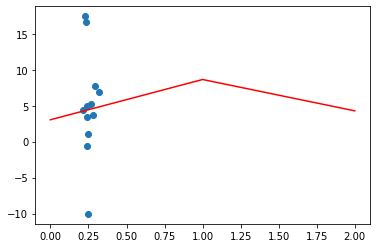

In [359]:
plt.scatter(X3,y3)
plt.plot(test_preds, color= 'red')
plt.show()

# Food For Thought
*"Quarterly earnings reports are important financial updates that provide a market glimpse on how stocks will likely be valued in the future. Stock prices tend to rise when earnings results exceed market expectations while disappointing earnings results tend to lower share prices. May 17, 2017"*

https://business.inquirer.net/229677/quarterly-earnings-reports-affect-stock-prices

# Resources

**Everything Textblob**

Install: https://textblob.readthedocs.io/en/dev/install.html

Tutorial: https://textblob.readthedocs.io/en/dev/classifiers.html#classifiers

Advance: https://textblob.readthedocs.io/en/dev/advanced_usage.html

**Everything YouTube**

Sentiment Analysis w/ Textblob: https://www.youtube.com/watch?v=N9CT6Ggh0oE

Sentiment Analysis w/ Textblob: https://www.youtube.com/watch?v=bUgKhp8YwO0

**Github**
Alice Zhao Github Notebook: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/3-Sentiment-Analysis.ipynb

**Quaterly Reports Info**

Fiscal Quarter (Q1, Q2, Q3, Q4): https://investinganswers.com/dictionary/q/quarter-q1-q2-q3-q4

**Historical Data**

Historical Prices: https://finance.yahoo.com/quote/SO/history?p=SO

# Human Resources 

**Lead Instructor For Flatiron 02172020 DS Bootcamp**

Bryan Anorld: https://www.linkedin.com/in/bryan-arnold-mathematics/

**Coach For Flatiron 02172020 DS Bootcamp**

Lindsey Berlin:  https://www.linkedin.com/in/lindseyberlin/